In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_excel("/content/15min_dataset_pre_NN.xlsx")

data = data.astype(float)

data.dropna(inplace=True)

X = data.drop(columns=["Rozsev 0-5"]).values
y = data["Rozsev 0-5"].values

# Splitting the dataset into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1234)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Splitting the dataset into validating and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors for training, validation, and testing data
X_train = torch.from_numpy(X_train.astype(np.float32))
X_val = torch.from_numpy(X_val.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_val = torch.from_numpy(y_val.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# Reshape target tensors to have shape (batch_size, 1)
y_train = y_train.view(y_train.shape[0], 1)
y_val = y_val.view(y_val.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class Model_one(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(Model_one, self).__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        # -> x needs to be: (batch_size, seq, input_size)

        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

        self.dropout1 = nn.Dropout(0.4)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.2)

    def forward(self, x):
        # Set initial hidden states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.rnn(x, h0)

        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # Decode the hidden state of the last time step
        out = out[:, -1, :]

        out = F.relu(self.fc1(out))
        out = self.dropout1(out)
        out = F.relu(self.fc2(out))
        out = self.dropout2(out)
        out = F.relu(self.fc3(out))
        out = self.dropout3(out)
        out = F.relu(self.fc4(out))
        out = self.dropout3(out)
        out = self.fc5(out)

        return out

In [ ]:
class Model_two(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(Model_two, self).__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)

        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

        self.dropout1 = nn.Dropout(0.4)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.2)

    def forward(self, x):
        # Set initial hidden states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.gru(x, h0)

        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # Decode the hidden state of the last time step
        out = out[:, -1, :]

        out = F.relu(self.fc1(out))
        out = self.dropout1(out)
        out = F.relu(self.fc2(out))
        out = self.dropout2(out)
        out = F.relu(self.fc3(out))
        out = self.dropout3(out)
        out = F.relu(self.fc4(out))
        out = self.dropout3(out)
        out = self.fc5(out)

        return out

In [ ]:
class Model_three(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(Model_three, self).__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)


        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

        self.dropout1 = nn.Dropout(0.4)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.2)

    def forward(self, x):

        # Set initial hidden states and cell states for LSTM
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0,c0))

        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # Decode the hidden state of the last time step
        out = out[:, -1, :]

        out = F.relu(self.fc1(out))
        out = self.dropout1(out)
        out = F.relu(self.fc2(out))
        out = self.dropout2(out)
        out = F.relu(self.fc3(out))
        out = self.dropout3(out)
        out = F.relu(self.fc4(out))
        out = self.dropout3(out)
        out = self.fc5(out)

        return out

In [ ]:
# Get the number of samples and features in the dataset
n_samples, n_features = X.shape

# Create an instance of the MyModelLogistic class with the number of input features as the argument
model = Model_one(n_features, 512, 4).to(device)
# Accessing parameters
# for param in model.parameters():
#     # Print each parameter of the model (weights and bias)
#    print(param)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [0/1000], Train Loss: 16.9402, Val Loss: 13.3160
Epoch [100/1000], Train Loss: 16.7379, Val Loss: 13.3525
Epoch [200/1000], Train Loss: 16.6104, Val Loss: 13.0020
Epoch [300/1000], Train Loss: 16.5638, Val Loss: 12.9370
Epoch [400/1000], Train Loss: 16.3528, Val Loss: 12.9582
Epoch [500/1000], Train Loss: 16.3490, Val Loss: 13.0088
Epoch [600/1000], Train Loss: 16.3461, Val Loss: 13.0986
Epoch [700/1000], Train Loss: 16.2593, Val Loss: 13.0333
Epoch [800/1000], Train Loss: 16.3165, Val Loss: 13.0501
Epoch [900/1000], Train Loss: 16.2735, Val Loss: 13.0564
Epoch [999/1000], Train Loss: 16.1851, Val Loss: 12.9472


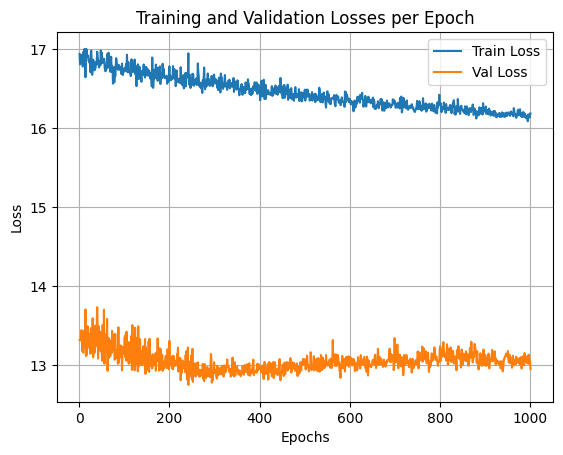

In [ ]:
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, batch_size=32):
    train_losses = []  # List to store training losses
    val_losses = []    # List to store validation losses

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        # Mini-batch training
        for i in range(0, len(X_train), batch_size):
            # Get mini-batch inputs and labels
            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size]

            # Ensure inputs are in the right shape for RNN (batch_size, seq_length, input_size)
            inputs = inputs.unsqueeze(1)  # Assuming inputs are 2D, add a batch dimension

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)  # Assuming labels are 1D

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate average training loss for the epoch
        train_loss = running_loss / (len(X_train) / batch_size)
        train_losses.append(train_loss)

        # Validation
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_inputs = X_val.unsqueeze(1)  # Assuming X_val is 2D, add a batch dimension
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs.squeeze(), y_val)  # Assuming y_val is 1D
            val_losses.append(val_loss.item())

        # Print progress every epoch
        if epoch % 100 == 0 or epoch == num_epochs-1:
            print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Train the model
num_epochs = 1000
train_losses, val_losses = train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs, batch_size=32)

# Plotting the losses
epochs = range(1, num_epochs+1)  # x-axis values (epochs)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get the number of samples and features in the dataset
n_samples, n_features = X.shape

# Create an instance of the MyModelLogistic class with the number of input features as the argument
model = Model_two(n_features, 512, 4).to(device)
# Accessing parameters
# for param in model.parameters():
#     # Print each parameter of the model (weights and bias)
#    print(param)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [0/1000], Train Loss: 116.8022, Val Loss: 76.7534
Epoch [100/1000], Train Loss: 21.2884, Val Loss: 14.7932
Epoch [200/1000], Train Loss: 20.2255, Val Loss: 13.4948
Epoch [300/1000], Train Loss: 19.1898, Val Loss: 12.8790
Epoch [400/1000], Train Loss: 18.2690, Val Loss: 12.8429
Epoch [500/1000], Train Loss: 17.7281, Val Loss: 13.0342
Epoch [600/1000], Train Loss: 17.6692, Val Loss: 12.9995
Epoch [700/1000], Train Loss: 17.4153, Val Loss: 13.0775
Epoch [800/1000], Train Loss: 17.2197, Val Loss: 12.9995
Epoch [900/1000], Train Loss: 16.9631, Val Loss: 13.0108
Epoch [999/1000], Train Loss: 16.9135, Val Loss: 13.1668


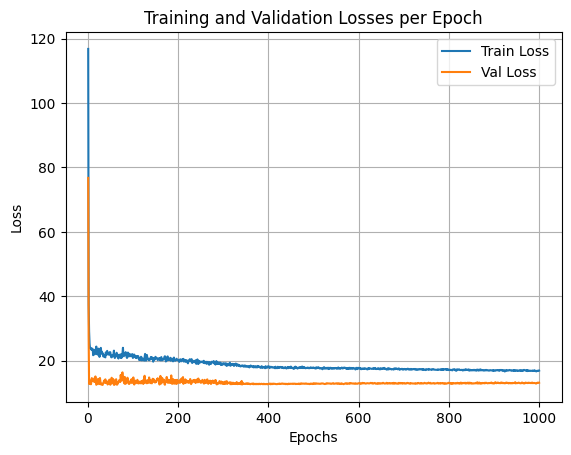

In [ ]:
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, batch_size=32):
    train_losses = []  # List to store training losses
    val_losses = []    # List to store validation losses

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        # Mini-batch training
        for i in range(0, len(X_train), batch_size):
            # Get mini-batch inputs and labels
            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size]

            # Ensure inputs are in the right shape for RNN (batch_size, seq_length, input_size)
            inputs = inputs.unsqueeze(1)  # Assuming inputs are 2D, add a batch dimension

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)  # Assuming labels are 1D

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate average training loss for the epoch
        train_loss = running_loss / (len(X_train) / batch_size)
        train_losses.append(train_loss)

        # Validation
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_inputs = X_val.unsqueeze(1)  # Assuming X_val is 2D, add a batch dimension
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs.squeeze(), y_val)  # Assuming y_val is 1D
            val_losses.append(val_loss.item())

        # Print progress every epoch
        if epoch % 100 == 0 or epoch == num_epochs-1:
            print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Train the model
num_epochs = 1000
train_losses, val_losses = train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs, batch_size=32)

# Plotting the losses
epochs = range(1, num_epochs+1)  # x-axis values (epochs)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get the number of samples and features in the dataset
n_samples, n_features = X.shape

# Create an instance of the MyModelLogistic class with the number of input features as the argument
model = Model_three(n_features, 512, 4  ).to(device)
# Accessing parameters
# for param in model.parameters():
#     # Print each parameter of the model (weights and bias)
#    print(param)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [ ]:
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, batch_size=32):
    train_losses = []  # List to store training losses
    val_losses = []    # List to store validation losses

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        # Mini-batch training
        for i in range(0, len(X_train), batch_size):
            # Get mini-batch inputs and labels
            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size]

            # Ensure inputs are in the right shape for RNN (batch_size, seq_length, input_size)
            inputs = inputs.unsqueeze(1)  # Assuming inputs are 2D, add a batch dimension

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)  # Assuming labels are 1D

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate average training loss for the epoch
        train_loss = running_loss / (len(X_train) / batch_size)
        train_losses.append(train_loss)

        # Validation
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_inputs = X_val.unsqueeze(1)  # Assuming X_val is 2D, add a batch dimension
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs.squeeze(), y_val)  # Assuming y_val is 1D
            val_losses.append(val_loss.item())

        # Print progress every epoch
        if epoch % 100 == 0 or epoch == num_epochs-1:
            print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Train the model
num_epochs = 1000
train_losses, val_losses = train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs, batch_size=32)

# Plotting the losses
epochs = range(1, num_epochs+1)  # x-axis values (epochs)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def test_model(model, criterion, X_test, y_test, batch_size=32):
    model.eval()
    test_losses = []

    with torch.no_grad():
        running_loss = 0.0
        y_true = []
        y_pred = []

        # Mini-batch testing
        for i in range(0, len(X_test), batch_size):

            inputs = X_test[i:i+batch_size]
            labels = y_test[i:i+batch_size]


            inputs = inputs.unsqueeze(1)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)

            running_loss += loss.item()


            y_true.extend(labels.cpu().numpy())
            y_pred.extend(outputs.squeeze().cpu().numpy())  # Assuming predictions are on CPU

        # Calculate average test loss
        test_loss = running_loss / (len(X_test) / batch_size)
        test_losses.append(test_loss)

        print(f'Test Loss: {test_loss:.4f}')

        # Convert lists to NumPy arrays for sklearn metrics
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        # Calculate regression metrics
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        print(f'Mean Squared Error (MSE): {mse:.4f}')
        print(f'R-squared (R2): {r2:.4f}')

    return test_losses


# Test the model
test_losses = test_model(model, criterion, X_test, y_test, batch_size=32)

Test Loss: 10.8941
Mean Squared Error (MSE): 9.1321
R-squared (R2): -0.0649
